<a href="https://www.kaggle.com/code/arnabmukherjee853/diabetes-disease-prediction?scriptVersionId=198364210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/diabetes.csv


In [34]:
df=pd.read_csv('/kaggle/input/heart-disease/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

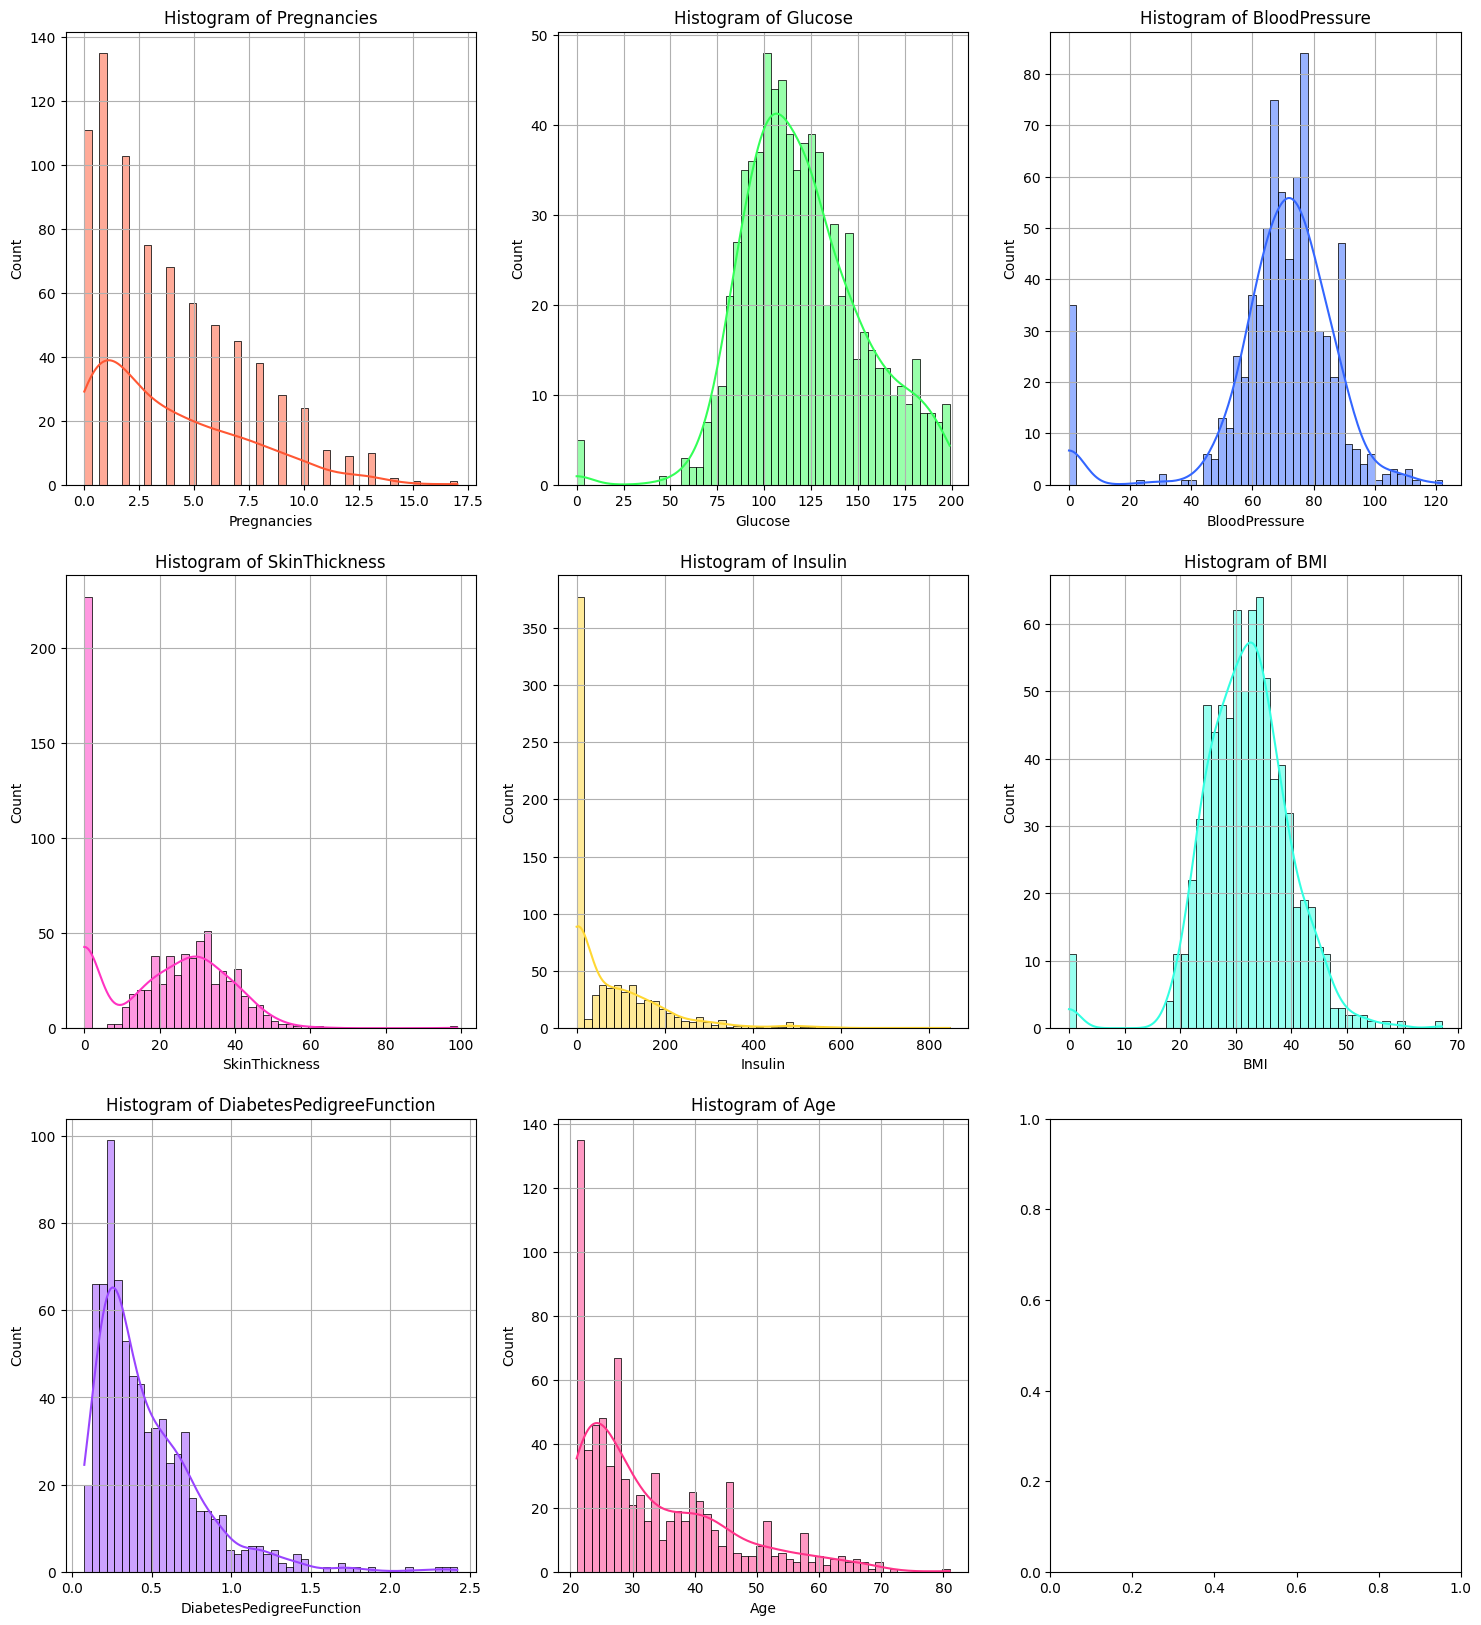

In [38]:
fig,axes=plt.subplots(3,3,figsize=(18,20))
colors=['#FF5733','#33FF57','#3366FF','#FF33C2','#FFD733','#33FFE2','#9944FF','#FF3389']
for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.histplot(data=df,x=df[df.columns[i]],bins=50,ax=ax,color=colors[i],kde=True)
    ax.set(xlabel=df.columns[i])
    ax.set_title(f'Histogram of {df.columns[i]}')
    ax.grid(True)

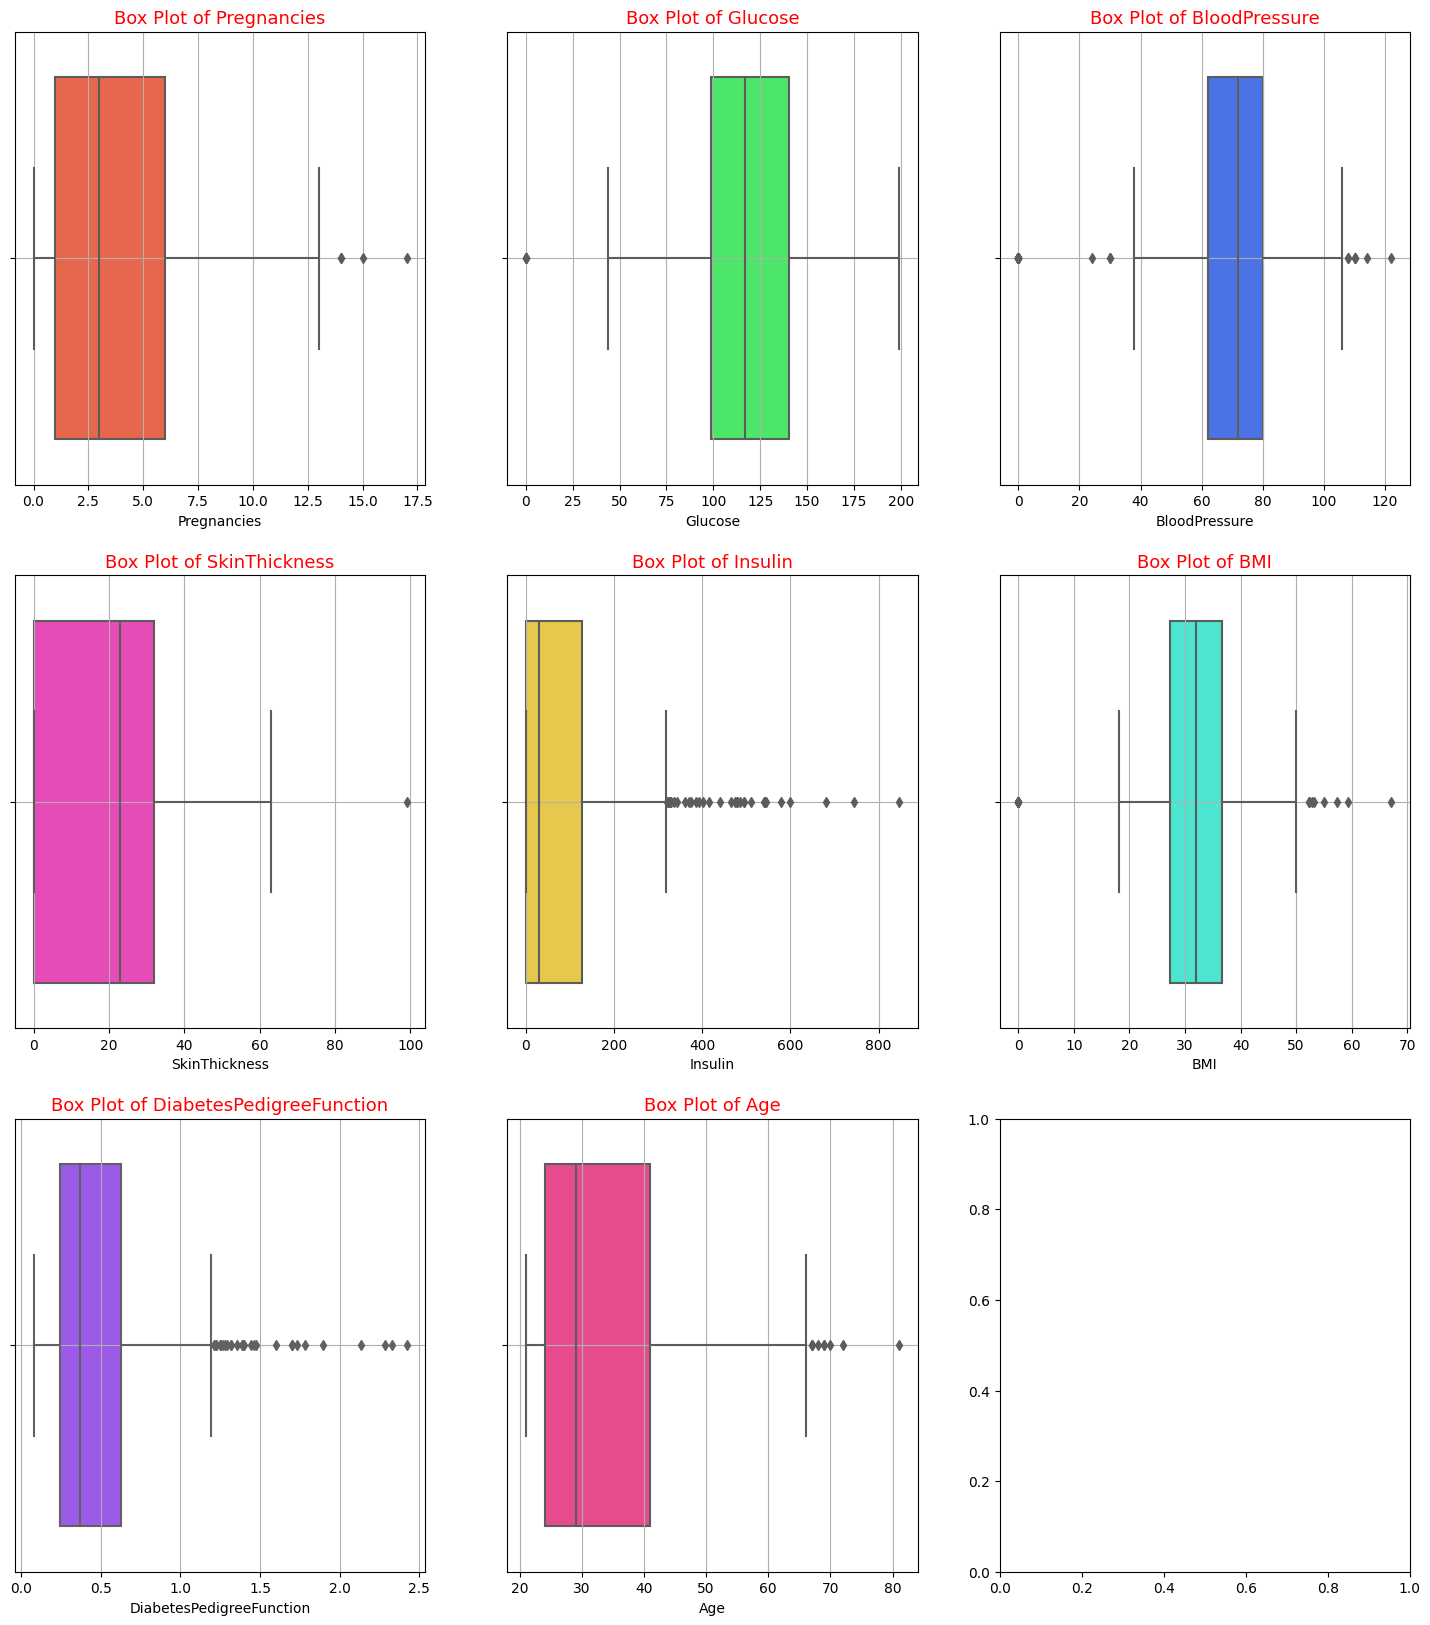

In [39]:
fig,axes=plt.subplots(3,3,figsize=(18,20))
for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.boxplot(data=df,x=df[df.columns[i]],color=colors[i],ax=ax)
    ax.set_title(f'Box Plot of {df.columns[i]}',color='red',fontsize=13)
    ax.grid(True)
                                

In [40]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


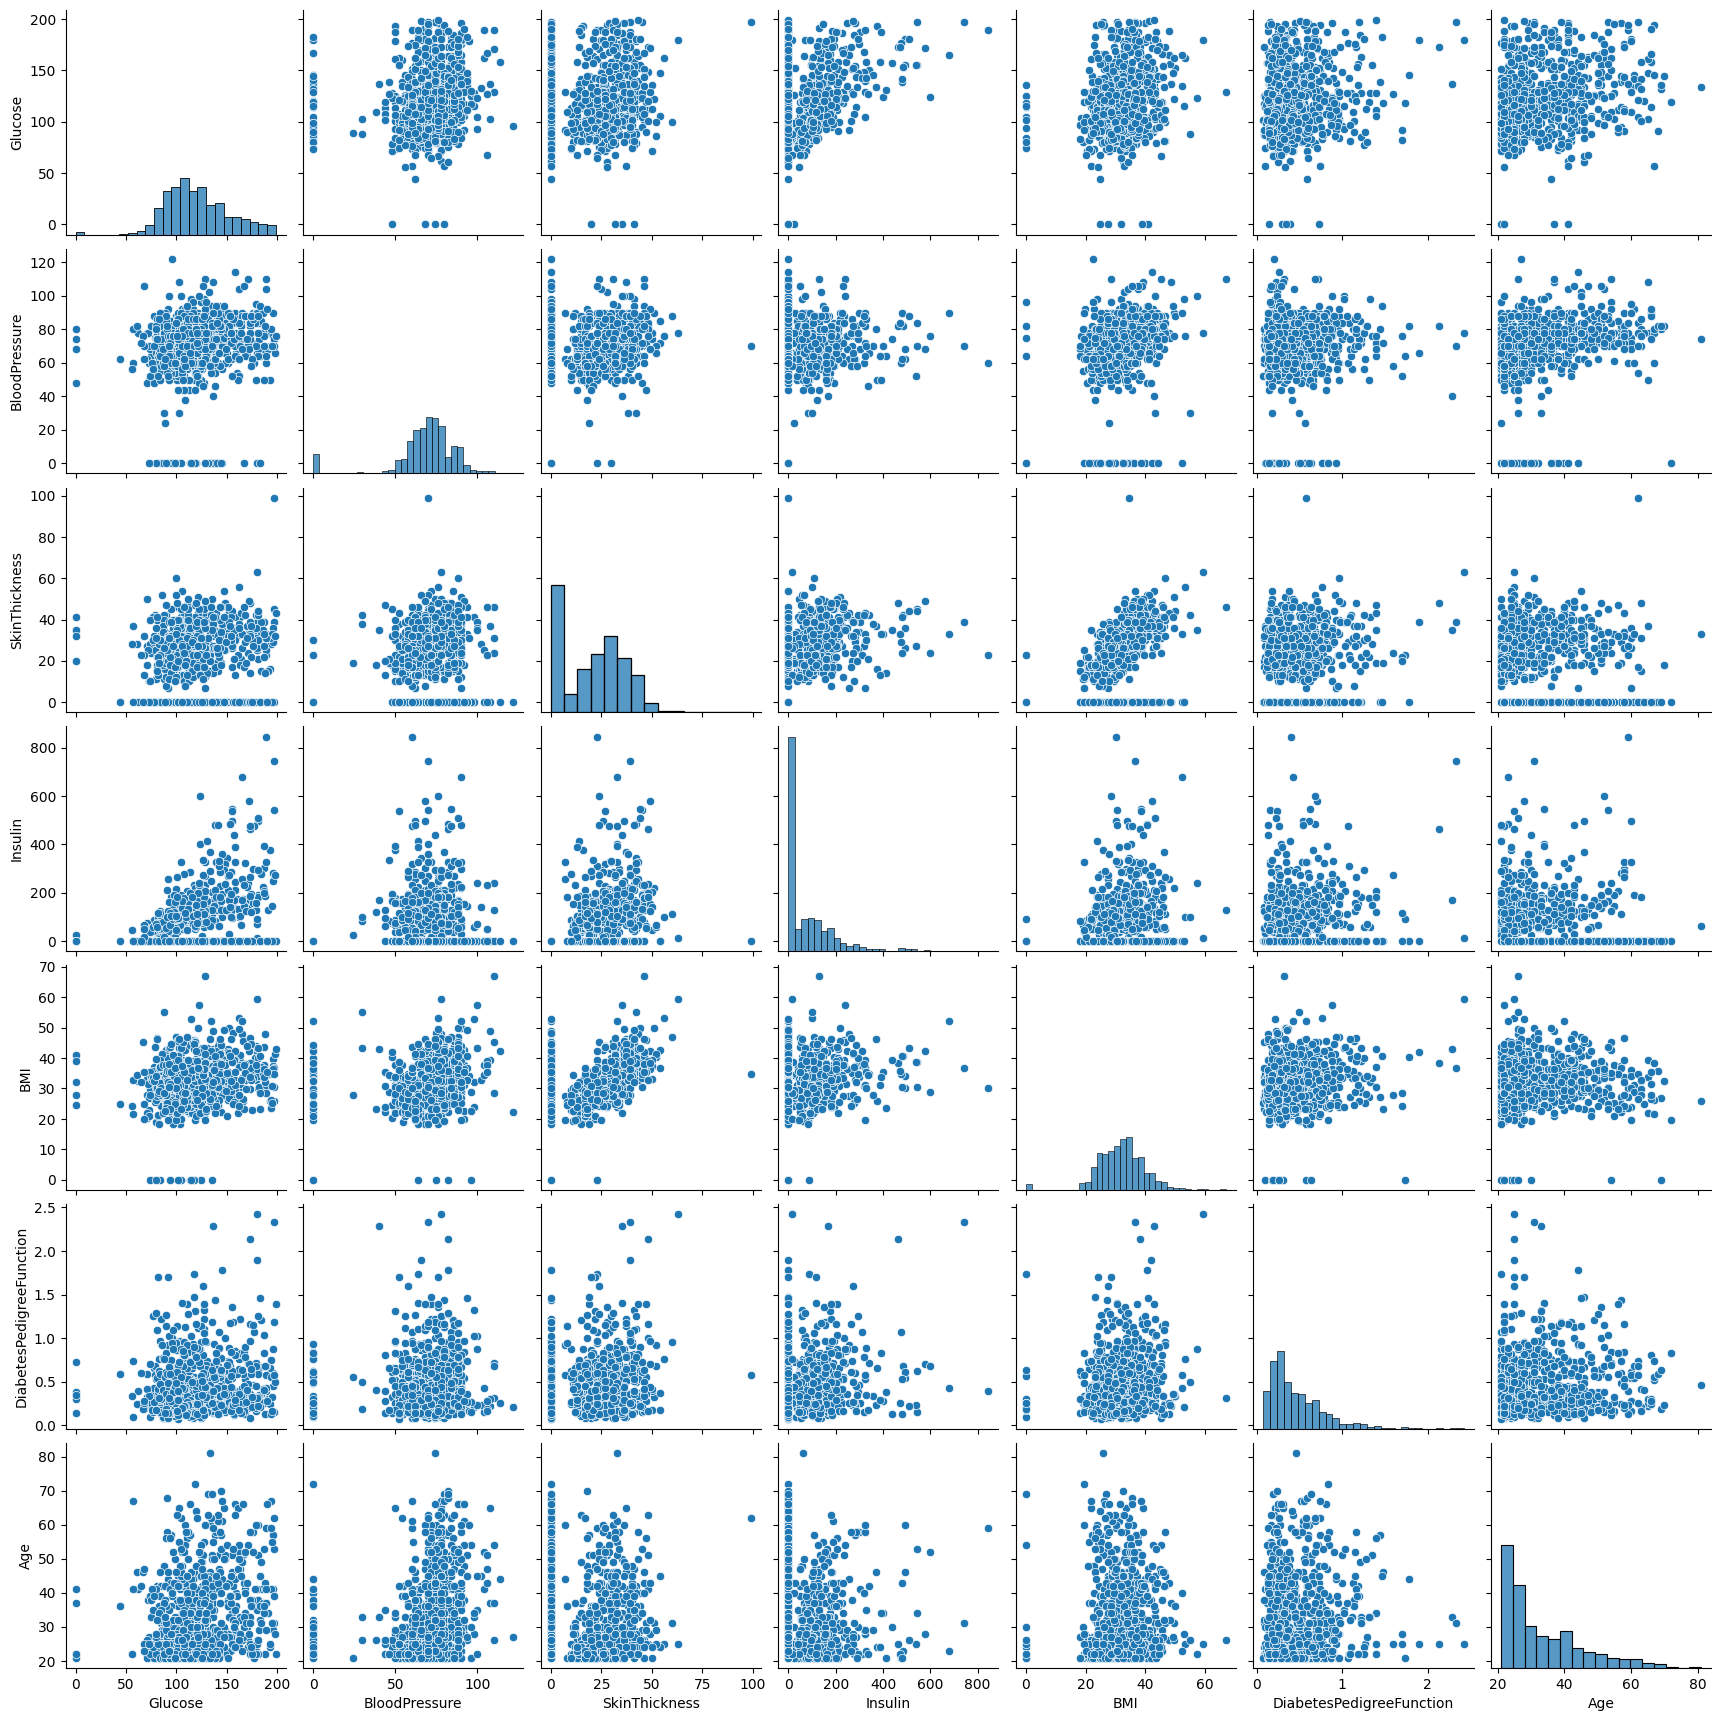

In [41]:
sns.pairplot(df.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [42]:
Correlation=df.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].corr()
Cm=sns.light_palette('purple',as_cmap=True)
Correlation.style.background_gradient(cmap=Cm)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [43]:
X=df.iloc[:,:len(df.columns)-1]
Y=df['Outcome']

In [44]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


**Feature Importance**

<Axes: >

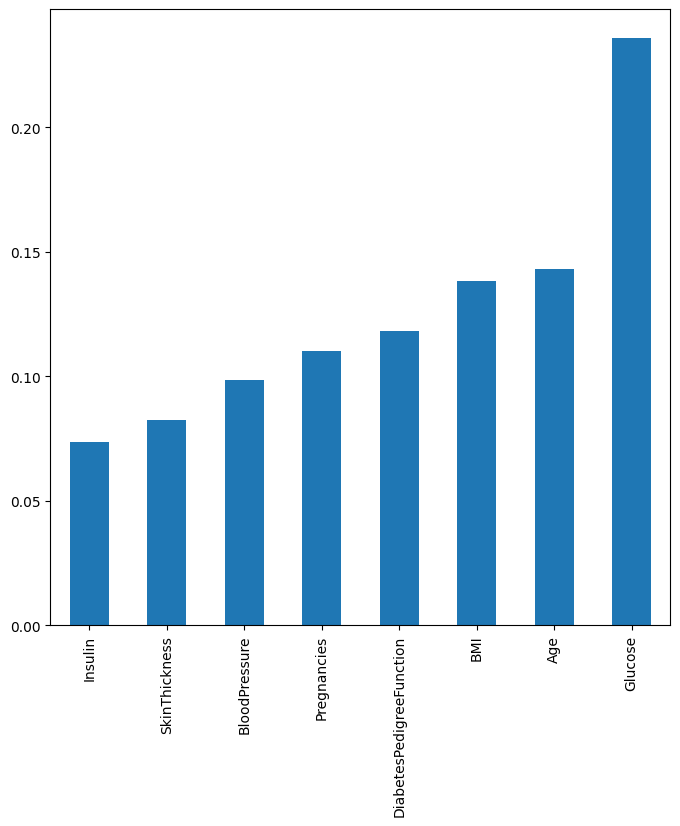

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(X,Y)
df_new=pd.Series(ETC.feature_importances_,index=X.columns)
plt.figure(figsize=(8,8))
df_new.sort_values().plot(kind='bar')

In [46]:
Q1=df['Glucose'].quantile(.25)
Q3=df['Glucose'].quantile(.75)
IQR=Q3-Q1
lower_b=Q1-1.5*IQR
upper_b=Q3+1.5*IQR
Df=df[df['Glucose'].between(lower_b,upper_b,inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
Q1=Df['Insulin'].quantile(0.25)
Q3=Df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*Q3
Df=Df[Df['Insulin'].between(lower,upper,inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
Q1 = Df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = Df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
Df = Df[Df['DiabetesPedigreeFunction'].between(lower,upper,inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
x=Df.loc[:,Df.columns!='Outcome']
y=Df['Outcome']

In [50]:
print(x.shape)
print(y.shape)

(701, 8)
(701,)


In [51]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               701 non-null    int64  
 1   Glucose                   701 non-null    int64  
 2   BloodPressure             701 non-null    int64  
 3   SkinThickness             701 non-null    int64  
 4   Insulin                   701 non-null    int64  
 5   BMI                       701 non-null    float64
 6   DiabetesPedigreeFunction  701 non-null    float64
 7   Age                       701 non-null    int64  
 8   Outcome                   701 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.8 KB


In [52]:
Df.Pregnancies = Df.Pregnancies.astype('object')
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               701 non-null    object 
 1   Glucose                   701 non-null    int64  
 2   BloodPressure             701 non-null    int64  
 3   SkinThickness             701 non-null    int64  
 4   Insulin                   701 non-null    int64  
 5   BMI                       701 non-null    float64
 6   DiabetesPedigreeFunction  701 non-null    float64
 7   Age                       701 non-null    int64  
 8   Outcome                   701 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.8+ KB


/tmp/ipykernel_32/1940044811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.Pregnancies = Df.Pregnancies.astype('object')


In [53]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn import set_config
import tensorflow
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Sequential

In [54]:
num_col=Df.select_dtypes(include=['float64','int64']).columns
num_col

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [55]:
cat_col = Df.select_dtypes(include=['object']).columns
cat_col

Index(['Pregnancies'], dtype='object')

In [56]:
Df[num_col].min()

Glucose                     44.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [63]:
pipeline_num = Pipeline(
    steps=[('Union',FeatureUnion(
        transformer_list=[('Box-Cox',ColumnTransformer([
            ('Power Transform',PowerTransformer(standardize=True,method='box-cox'),['DiabetesPedigreeFunction','Age'])],remainder='drop')),
            ('SC',ColumnTransformer([('Standard Scaling',StandardScaler(),['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])],remainder='drop'))]))])
pipeline_cat = Pipeline(steps=[('LE',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])
CT= make_column_transformer(
(pipeline_num,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']),
(pipeline_cat,['Pregnancies']),
    remainder='drop')
CT

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('Union',
                                                  FeatureUnion(transformer_list=[('Box-Cox',
                                                                                  ColumnTransformer(transformers=[('Power '
                                                                                                                   'Transform',
                                                                                                                   PowerTransformer(method='box-cox'),
                                                                                                                   ['DiabetesPedigreeFunction',
                                                                                                                    'Age'])])),
                                                                                 ('SC',
                                                                                  ColumnTransformer(transformers=[('Standard '
                                                                                                                   'Scaling',
                                                                                                                   StandardScaler(),
                                                                                                                   ['Glucose',
                                                                                                                    'BloodPressure',
                                                                                                                    'SkinThickness',
                                                                                                                    'Insulin',
                                                                                                                    'BMI'])]))]))]),
                                 ['Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                                  'Age']),
                                ('pipeline-2',
                                 Pipeline(steps=[('LE',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Pregnancies'])])

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.21,random_state=13)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(553, 8)
(148, 8)
(553,)
(148,)


In [65]:
ytrain.info()

<class 'pandas.core.series.Series'>
Index: 553 entries, 725 to 377
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
553 non-null    int64
dtypes: int64(1)
memory usage: 8.6 KB


In [66]:
param_rs_gs_dt = {'model__criterion':['entropy','gini'],
            'model__max_depth': range(4,12),
            'model__splitter': ['best','random']}
param_rs_gs_knn = { 'model__n_neighbors': [i for i in range(3,15,2)],
                   'model__weights': ['uniform','distance'],
                   'model__metric': ['euclidean','manhattan','minkowski']} 

In [67]:
models= {'Logistic Regression':Pipeline([('transformer',CT),('model',LogisticRegression())]),
         'Decision Tree Classifier':Pipeline([('transformer',CT),('model',DecisionTreeClassifier(criterion='entropy',splitter='best'))]),
         'KNN Classifier':Pipeline([('transformer',CT),('model',KNeighborsClassifier(n_neighbors=13))]),
         'RandomForest Classifier':Pipeline([('transformer',CT),('model',RandomForestClassifier(n_estimators=121,criterion='entropy',))]),
         'ExtraTree Classifier':Pipeline([('transformer',CT),('model',ExtraTreesClassifier(n_estimators=121,criterion='entropy',random_state=13,))]),
         'Naive Bayes':Pipeline([('transformer',CT),('model',GaussianNB())]),
         'DecisionTreeClassifier_RSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                                         param_distributions=param_rs_gs_dt,
                                                         cv=7,
                                                         random_state=13,
                                                         n_iter=11),
         'DecisionTreeClassifier_GSDT':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                                   param_grid=param_rs_gs_dt,
                                                   cv=7,),
         'KNNClassifier_RSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                                param_distributions=param_rs_gs_knn,
                                                random_state=13,),
         'KNNClassifier_GSCV':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                          param_grid=param_rs_gs_knn,
                                          cv =7,),
         'SVM':Pipeline([('transformer',CT),('model',SVC(kernel='poly',degree=3,probability=True))]),
         }
models.items()

dict_items([('Logistic Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('Union',
                                                                   FeatureUnion(transformer_list=[('Box-Cox',
                                                                                                   ColumnTransformer(transformers=[('Power '
                                                                                                                                    'Transform',
                                                                                                                                    PowerTransformer(method='box-cox'),
                                                                                                                                    ['DiabetesPedigreeFunction',
                                                                   

Fitting model: Logistic Regression
Model Name:: Logistic Regression
Accuracy Score of Logistic Regression is 0.7972972972972973
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       104
           1       0.69      0.57      0.62        44

    accuracy                           0.80       148
   macro avg       0.76      0.73      0.74       148
weighted avg       0.79      0.80      0.79       148

***************************************************************************************************************************************
***************************************************************************************************************************************
Fitting model: Decision Tree Classifier
Model Name:: Decision Tree Classifier
Accuracy Score of Decision Tree Classifier is 0.7297297297297297
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       104
           1       0.

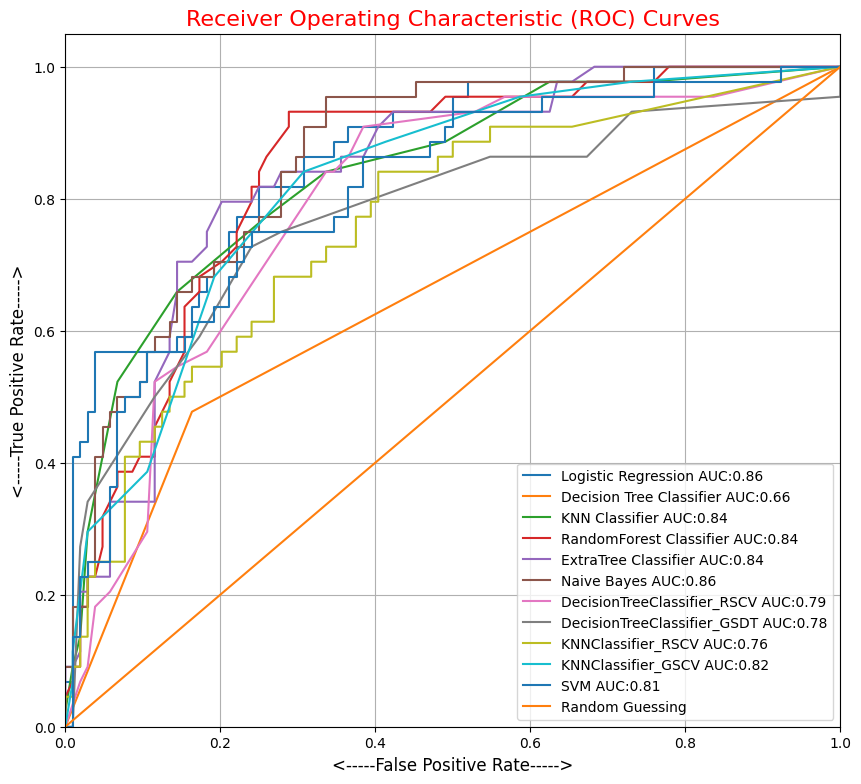

In [68]:
plt.figure(figsize=(10,9))
for model_name,model in models.items():
    print(f"Fitting model: {model_name}")
    
    if isinstance(model,(GridSearchCV,RandomizedSearchCV)):
        model.fit(xtrain,ytrain)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
        
    else:
        best_model = model
        best_model.fit(xtrain,ytrain)
        
    y_pred = best_model.predict(xtest)
    y_pred_proba = best_model.predict_proba(xtest)[:,1]
    
    fpr,tpr,_ = roc_curve(ytest,y_pred_proba)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label= f'{model_name} AUC:{roc_auc:.2f}')
    
    print(f'Model Name:: {model_name}')
    print(f'Accuracy Score of {model_name} is {accuracy_score(ytest,y_pred)}')
    print(classification_report(ytest,y_pred))
    print('*****'*27)
    print('*****'*27)
plt.plot([0,1],[0,1],label='Random Guessing')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('<-----False Positive Rate----->',fontsize=12)
plt.ylabel('<-----True Positive Rate----->',fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves',fontsize=16,color='red')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**Using Neural Network**

In [75]:
transformed = CT.fit_transform(Df)
X= transformed
y=Df.Outcome
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.21,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(553, 8)
(148, 8)
(553,)
(148,)


In [70]:
import tensorflow as tf

In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(80,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(160,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(350,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 80)                720       
                                                                 
 dropout_15 (Dropout)        (None, 80)                0         
                                                                 
 dense_21 (Dense)            (None, 160)               12960     
                                                                 
 dropout_16 (Dropout)        (None, 160)               0         
                                                                 
 dense_22 (Dense)            (None, 350)               56350     
                                                                 
 dropout_17 (Dropout)        (None, 350)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                

In [112]:
model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'],)
M = model.fit(Xtrain,ytrain, validation_data=(Xtest,ytest), epochs=25,batch_size=24,)

Epoch 1/25
24/24 [==============================] - 1s 12ms/step - loss: 0.2360 - accuracy: 0.9259 - val_loss: 0.8080 - val_accuracy: 0.7432
Epoch 2/25
24/24 [==============================] - 0s 4ms/step - loss: 0.2082 - accuracy: 0.9530 - val_loss: 0.9259 - val_accuracy: 0.7365
Epoch 3/25
24/24 [==============================] - 0s 4ms/step - loss: 0.2071 - accuracy: 0.9494 - val_loss: 0.9649 - val_accuracy: 0.7365
Epoch 4/25
24/24 [==============================] - 0s 4ms/step - loss: 0.2052 - accuracy: 0.9494 - val_loss: 1.0726 - val_accuracy: 0.7162
Epoch 5/25
24/24 [==============================] - 0s 4ms/step - loss: 0.2486 - accuracy: 0.9331 - val_loss: 0.9063 - val_accuracy: 0.7365
Epoch 6/25
24/24 [==============================] - 0s 4ms/step - loss: 0.2144 - accuracy: 0.9458 - val_loss: 0.8867 - val_accuracy: 0.7432
Epoch 7/25
24/24 [==============================] - 0s 4ms/step - loss: 0.1981 - accuracy: 0.9458 - val_loss: 0.9289 - val_accuracy: 0.7297
Epoch 8/25
24/24 [=

In [113]:
print("train score", model.evaluate(Xtrain,ytrain))
print("test score", model.evaluate(Xtest, ytest))

18/18 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9765
train score [0.1472933143377304, 0.9764918684959412]
5/5 [==============================] - 0s 2ms/step - loss: 0.9019 - accuracy: 0.7500
test score [0.9019386768341064, 0.75]


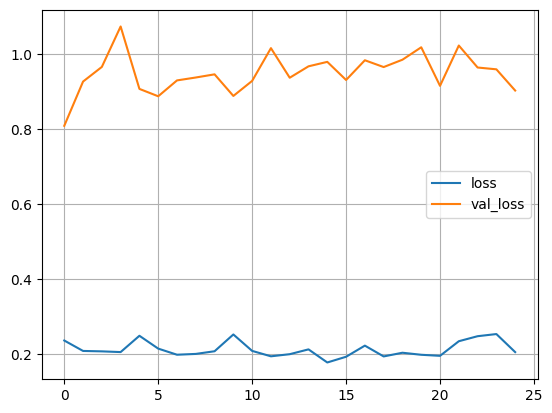

In [114]:
plt.plot(M.history['loss'], label='loss')
plt.plot(M.history['val_loss'], label='val_loss')
plt.legend()
plt.grid(True)
plt.show()

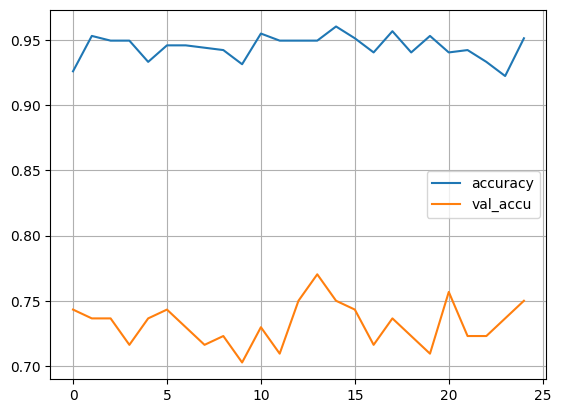

In [115]:
plt.plot(M.history['accuracy'], label='accuracy')
plt.plot(M.history['val_accuracy'], label='val_accu')
plt.legend()
plt.grid(True)
plt.show()